In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from datetime import datetime
import cufflinks as cf
import seaborn as sns

C:\Users\keyur\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0



In [2]:
final_data = pd.read_csv("final_data.csv", low_memory=False)

In [3]:
filtered_dataframe = final_data.dropna(subset=['AQI_Bucket'])
filtered_dataframe = filtered_dataframe.drop(["EBE", "NMHC", "TCH", "TOL", "CH4", "lat", "lon", "PM25"], axis=1)

In [4]:
filtered_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754445 entries, 41647 to 1796091
Data columns (total 38 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Date                    object 
 1   Benzene                 float64
 2   CO                      float64
 3   NO                      float64
 4   NO2                     float64
 5   O3                      float64
 6   PM10                    float64
 7   SO2                     float64
 8   StationId               object 
 9   NOx                     float64
 10  Country                 object 
 11  Unnamed: 0              float64
 12  City_x                  object 
 13  Datetime                object 
 14  PM2.5                   float64
 15  NH3                     float64
 16  Toluene                 float64
 17  Xylene                  float64
 18  AQI                     float64
 19  AQI_Bucket              object 
 20  StationName_x           object 
 21  State_x                 obj

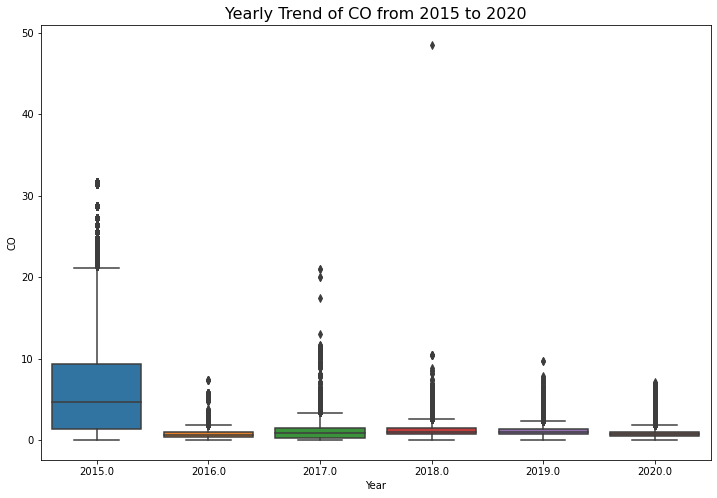

In [5]:
columns = 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'
col = 'CO'
plt.figure(figsize=(12,8))
a = sns.boxplot(x= 'Year', y = col, data= filtered_dataframe)
a.set_title(f"Yearly Trend of {col} from 2015 to 2020", fontsize=16)
display()

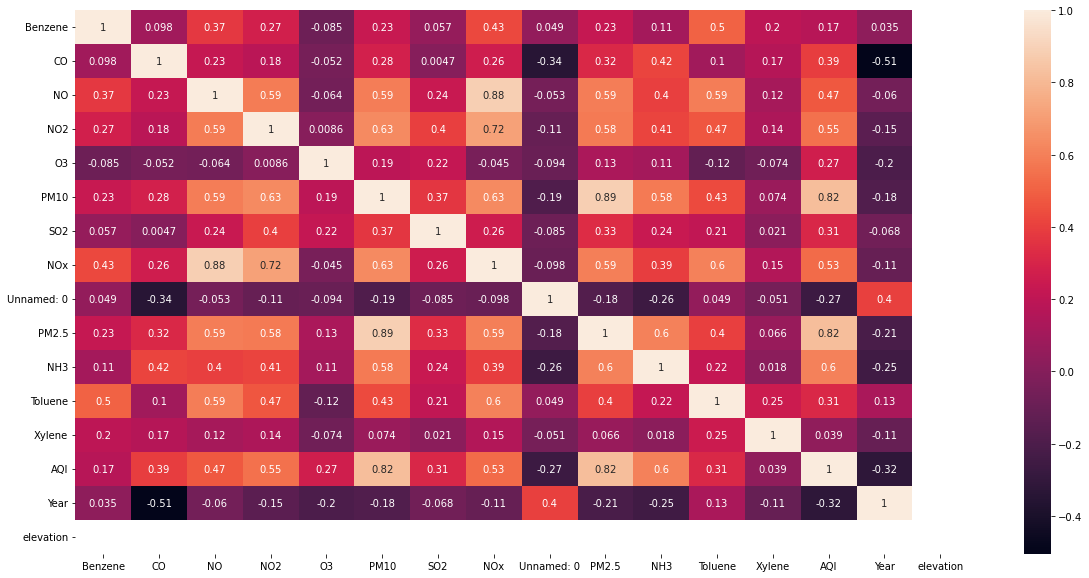

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(filtered_dataframe.corr(),annot=True)
plt.show()

In [7]:
filtered_dataframe['V_P_C'] = filtered_dataframe['PM2.5']+filtered_dataframe['PM10']+filtered_dataframe['NO']+filtered_dataframe['NO2']+filtered_dataframe['NOx']+filtered_dataframe['NH3']+filtered_dataframe['CO']
filtered_dataframe['I_P_C'] = filtered_dataframe['SO2']+filtered_dataframe['O3']+filtered_dataframe['Benzene']+filtered_dataframe['Toluene']+filtered_dataframe['Xylene']

In [8]:
# filtered_dataframe = filtered_dataframe.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
#        'O3','Benzene','Toluene','Xylene'],axis=1)

In [9]:
most_polluted_citites = filtered_dataframe.groupby(['City_y']).agg({'I_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_industry = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_industry.append({'City' : row[0], 'I_P_C': row[1]})
most_polluted_citites_by_industry = pd.DataFrame(most_polluted_citites_by_industry)

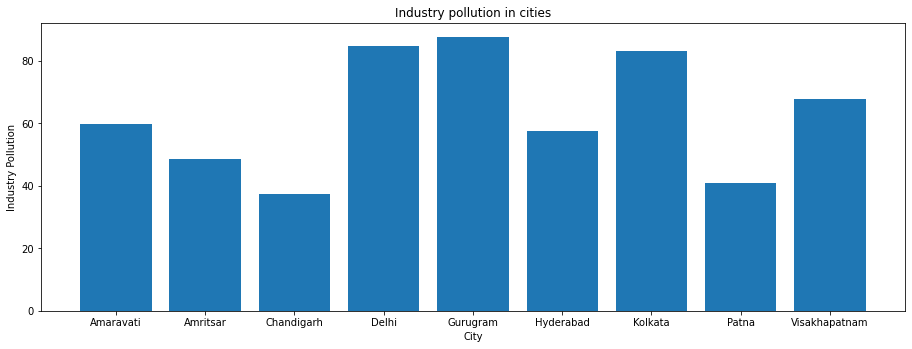

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(most_polluted_citites_by_industry['City'], most_polluted_citites_by_industry['I_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Industry Pollution')
ax.set_title('Industry pollution in cities')
plt.show()

In [11]:
most_polluted_citites = filtered_dataframe.groupby(['City_y']).agg({'V_P_C': ['mean']})
most_polluted_citites = most_polluted_citites.reset_index()
most_polluted_citites_by_vehicle = []
for index, row in most_polluted_citites.iterrows():
    most_polluted_citites_by_vehicle.append({'City' : row[0], 'V_P_C': row[1]})
most_polluted_citites_by_vehicle = pd.DataFrame(most_polluted_citites_by_vehicle)
most_polluted_citites_by_vehicle

,City,V_P_C
0,Amaravati,205.297626
1,Amritsar,266.852765
2,Chandigarh,192.374623
3,Delhi,514.245884
4,Gurugram,235.159711
5,Hyderabad,212.726459
6,Kolkata,264.448328
7,Patna,375.271921
8,Visakhapatnam,249.707885


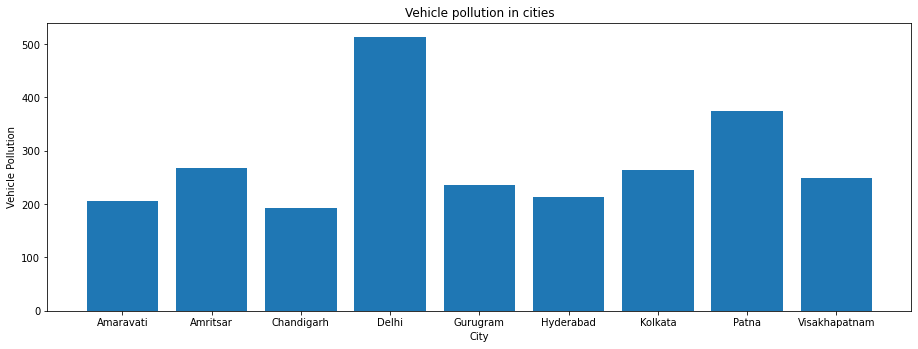

<Figure size 864x576 with 0 Axes>

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
plt.figure(figsize=(12,8))
ax.bar(most_polluted_citites_by_vehicle['City'], most_polluted_citites_by_vehicle['V_P_C'])
ax.set_xlabel('City')
ax.set_ylabel('Vehicle Pollution')
ax.set_title('Vehicle pollution in cities')
plt.show()

In [13]:
filtered_dataframe.dtypes

Date                       object
Benzene                   float64
CO                        float64
NO                        float64
NO2                       float64
O3                        float64
PM10                      float64
SO2                       float64
StationId                  object
NOx                       float64
Country                    object
Unnamed: 0                float64
City_x                     object
Datetime                   object
PM2.5                     float64
NH3                       float64
Toluene                   float64
Xylene                    float64
AQI                       float64
AQI_Bucket                 object
StationName_x              object
State_x                    object
Status_x                   object
Region_x                   object
Day_period                 object
Month                      object
Year                      float64
Season                     object
Weekday_or_weekend         object
Regular_day_or

In [14]:
most_polluted = filtered_dataframe[['City_y', 'AQI', 'PM10', 'CO']].groupby(['City_y']).mean().sort_values(by = 'AQI', ascending = False)
most_polluted

,AQI,PM10,CO
City_y,,,
Delhi,250.877459,222.509182,2.149014
Patna,168.309576,131.367501,1.146379
Gurugram,130.930655,116.747391,0.753638
Amritsar,129.819569,119.599065,0.778818
Kolkata,118.319874,96.210939,0.687164
Visakhapatnam,117.818135,107.645268,0.874057
Amaravati,110.500410,93.028379,0.566483
Hyderabad,102.245748,92.656682,0.559903
Chandigarh,90.919598,81.816886,0.619286


<Figure size 864x576 with 0 Axes>

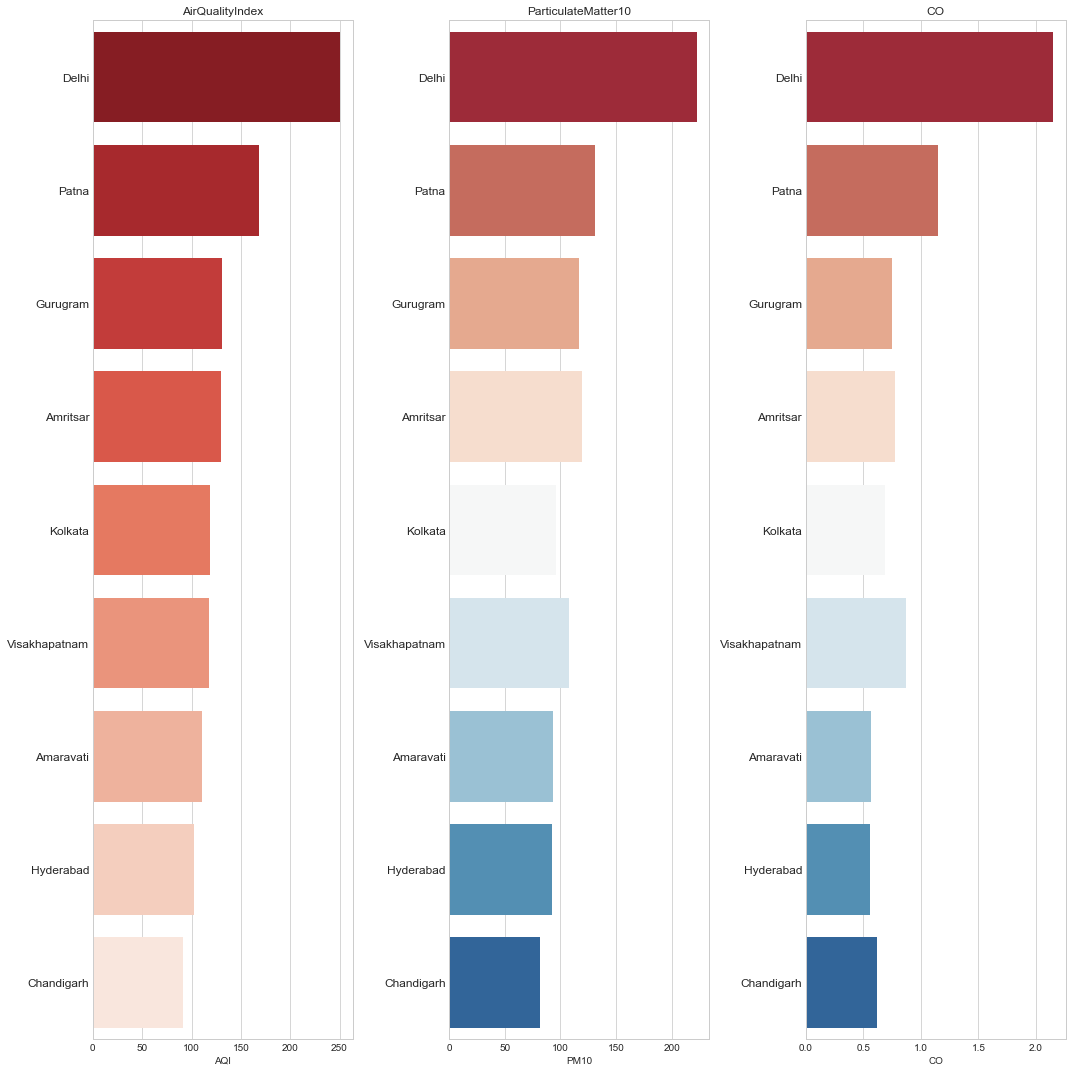

In [15]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
f, ax_ = plt.subplots(1, 3, figsize = (15,15))

bar1 = sns.barplot(x = most_polluted.AQI,
                   y = most_polluted.index,
                   palette = 'Reds_r',
                   ax = ax_[0]);

bar1 = sns.barplot(x = most_polluted.PM10,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[1]);

bar1 = sns.barplot(x = most_polluted.CO,
                   y = most_polluted.index,
                   palette = 'RdBu',
                   ax = ax_[2]);

titles = ['AirQualityIndex', 'ParticulateMatter10', 'CO']
for i in range(3) :
    ax_[i].set_ylabel('')   
    ax_[i].set_yticklabels(labels = ax_[i].get_yticklabels(),fontsize = 12);
    ax_[i].set_title(titles[i])
    f.tight_layout()

<AxesSubplot:xlabel='AQI', ylabel='NO2'>

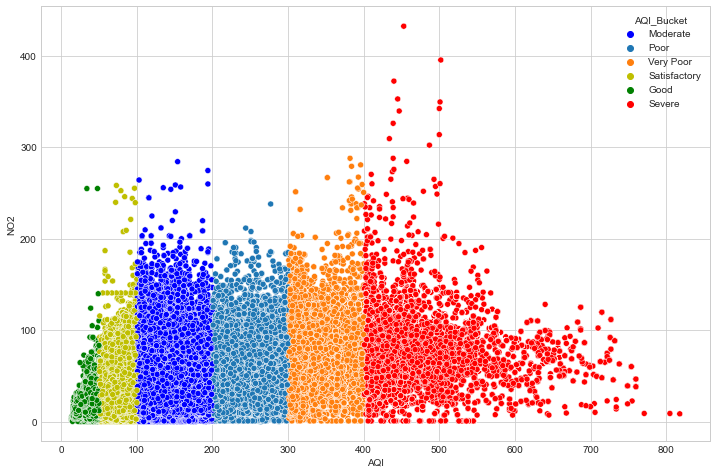

In [16]:
plt.figure(figsize=(12,8))
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'NO2', data=filtered_dataframe,hue ='AQI_Bucket',palette = palette, ci= None)

Text(0.5, 1.0, 'Outliers')

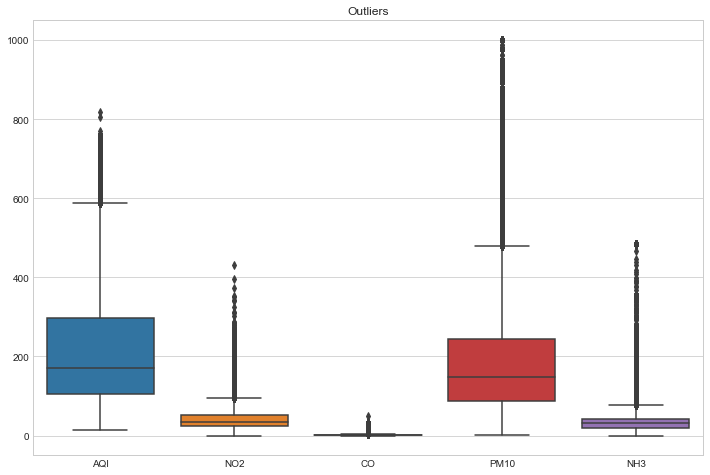

In [17]:
outliers = pd.DataFrame({'AQI': filtered_dataframe['AQI'], 
                         'NO2': filtered_dataframe['NO2'], 
                         'CO': filtered_dataframe['CO'], 
                         'PM10': filtered_dataframe['PM10'], 
                         'NH3': filtered_dataframe['NH3']})
plt.figure(figsize=(12,8))
sns.boxplot(data=outliers).set_title('Outliers')

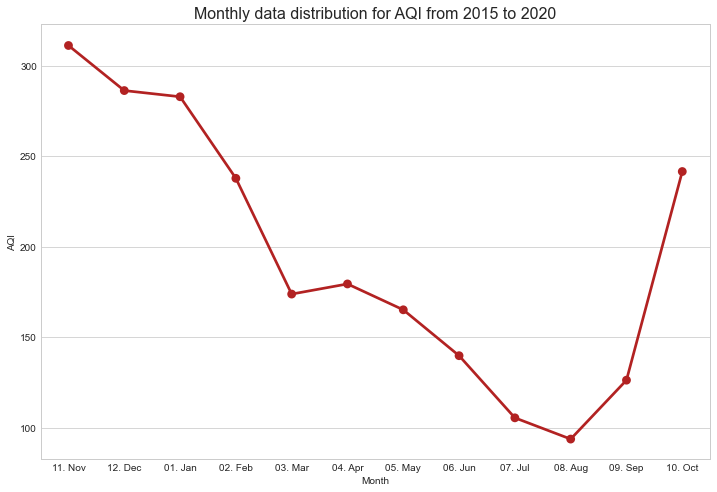

In [18]:
plt.figure(figsize=(12,8))
a = sns.pointplot(x= "Month", y= 'AQI', data=filtered_dataframe, color='firebrick')
a.set_title(f"Monthly data distribution for AQI from 2015 to 2020", fontsize=16)
display()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlable'

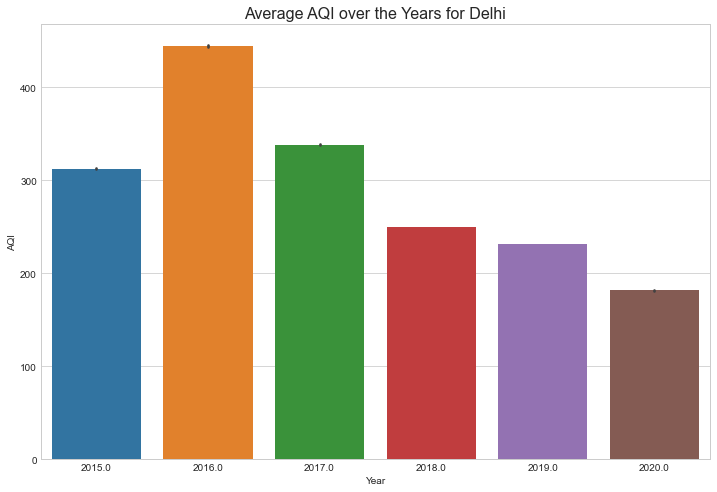

In [19]:
col = 'Delhi'
plt.figure(figsize=(12,8))
x= filtered_dataframe[filtered_dataframe['City_y']==col]
sns.barplot(x='Year', y='AQI', data=x, palette ='tab10')
plt.title(f"Average AQI over the Years for {col}", fontsize=16)
plt.set_xlable('Year', fontsize = 12)
plt.set_ylable('AQI', fontsize = 12)
display()

In [ ]:
g = sns.catplot(
    data=filtered_dataframe, kind="bar",
    x="AQI", y="City_y", hue="City_y",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")